<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***Classificação do Nível de Poluição da Água***
---

*Siga esse template para entrega do seu projeto. O código deste notebook precisa ser 100% executável.*

In [64]:
#@title Identificação do Grupo

#@markdown Turma **7N**

#@markdown Integrantes do Grupo (*informe \<TIA\>,\<nome\>*)
Aluno1 = '31941745, Lucca Raposo Quieregatto Pinto ' #@param {type:"string"} 
Aluno2 = '31938221, Danilo Lassabia Mathias ' #@param {type:"string"}



# **Apresentação**

# Problema



O trabalho se trata de um classificador da poluição da água, sendo 0 a mais limpa e 4 a mais poluida. Os dados foram escolhidos pois são úteis e relevantes para fazer a classificação e se relacionam com sustentabilidade.



# Referencial Teórico

https://www.kaggle.com/datasets/ozgurdogan646/water-quality-dataset

# Metodologia 

Os dados foram baixados, preparados, normalizados e foi feito hot code para deixar tudo necessário numérico. Além disso, o foram desconsiderados valores fora da curva a fim de obter melhor resultado. As entradas de treino e de teste foram separadas e as saídas foram estipuladas a partir da coluna "resultMeanValue", com valores de 0 até 4 para indicar o nível de pouluição, sendo 0 a mais limpa e 4 a mais poluida. Para fazer a classificação em um utilizamos o método Knn e no outro árvore de decisão. 



# Resultados

A partir dos dois modelos classificadores aplicados, foi possível determinar o nível de limpeza de amostras de água com base em fatores de definição. Foi obtido um acerto maior quando aplicado ao modelo 1 utilizando uma entrada ótima, porém o modelo 2 se mostra mais estável e com alta porcentagem de acerto.

# **Implementação**

# Base de Dados 

Os dados escolhidos foram de qualidade da água para poder avaliar a poluição. Os tratamentos feitos nos dados foram: retirar os dados categóricos desnecessários, fazer o hot code e separar os dados de treinamento e de teste.




In [65]:
import pandas as pd
df = pd.read_csv("/content/waterPollution.csv")
df.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


## **Modelo 1**

O algoritmo utilizado no modelo 1 foi KNN.

### **Modelo 1:** Preparação dos Dados


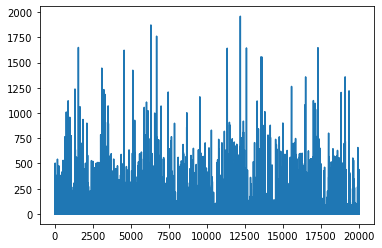

In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df.dropna(axis=0,inplace=True)
df = df.drop(df[df.resultMeanValue > 2000].index)

columns = ("parameterWaterBodyCategory","observedPropertyDeterminandCode","procedureAnalysedFraction","procedureAnalysedMedia","resultUom","parameterSamplingPeriod","waterBodyIdentifier","Country")
for i in columns:
  hot_code = pd.get_dummies(df[i])
  df = pd.concat([df,hot_code],axis=1)
  df = df.drop(columns=[i])

x = df.drop(["resultMeanValue"],axis = 1)
y = df["resultMeanValue"].values

df["resultMeanValue"].plot()


### **Modelo 1:** Modelo


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)

def makeClass(y):
  i = 0
  for x in y:
    if(x < 2000 and x >= 1000):
      y[i] = 4
    elif(x < 1000 and x >= 500):
      y[i] = 3
    elif(x < 500 and x >= 250):
      y[i] = 2
    elif(x < 250 and x >= 100):
      y[i] = 1
    else:
      y[i] = 0
    i += 1
  return y

y_train, y_test = makeClass(y_train),makeClass(y_test)

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

for i in range(1,7):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  print("Accuracy of K =",i, ":", metrics.accuracy_score(y_test, y_pred))


Accuracy of K = 1 : 0.9218003520241388
Accuracy of K = 2 : 0.9363842092029168
Accuracy of K = 3 : 0.9283379431732461
Accuracy of K = 4 : 0.931229570027659
Accuracy of K = 5 : 0.9289665577068141
Accuracy of K = 6 : 0.9288408348001006


### **Modelo 1:** Resultados


Obteve-se um melhor resultado utilizando K = 2

Accuracy: 0.9288408348001006


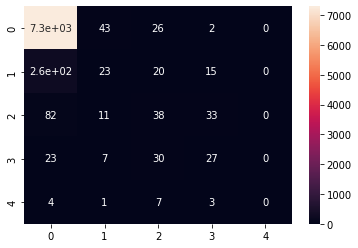

In [70]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True)

## **Modelo 2**

O algoritmo utilizado no modelo 2 foi o de Árvore de Decisão

### **Modelo 2:** Preparação dos Dados


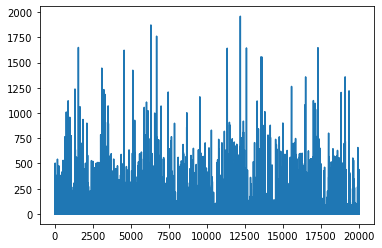

In [72]:
df = pd.read_csv("/content/waterPollution.csv")
df.head()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df.dropna(axis=0,inplace=True)
df = df.drop(df[df.resultMeanValue > 2000].index)

columns = ("parameterWaterBodyCategory","observedPropertyDeterminandCode","procedureAnalysedFraction","procedureAnalysedMedia","resultUom","parameterSamplingPeriod","waterBodyIdentifier","Country")
for i in columns:
  hot_code = pd.get_dummies(df[i])
  df = pd.concat([df,hot_code],axis=1)
  df = df.drop(columns=[i])

x = df.drop(["resultMeanValue"],axis = 1)
y = df["resultMeanValue"].values

df["resultMeanValue"].plot()

### **Modelo 2:** Modelo


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state = 42)

def makeClass(y):
  i = 0
  for x in y:
    if(x < 2000 and x >= 1000):
      y[i] = 4
    elif(x < 1000 and x >= 500):
      y[i] = 3
    elif(x < 500 and x >= 250):
      y[i] = 2
    elif(x < 250 and x >= 100):
      y[i] = 1
    else:
      y[i] = 0
    i += 1
  return y

y_train, y_test = makeClass(y_train),makeClass(y_test)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9386472215237617


### **Modelo 2:** Resultados


Accuracy: 0.9386472215237617


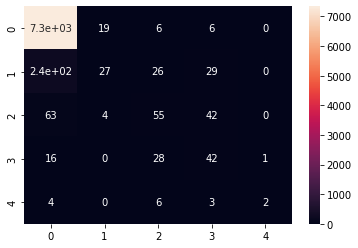

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True)

# **Conclusão** 

*Os dois modelos utilizados se sairam bem e apresentaram resultados de alta acurácia. Porém o modelo 2 teve um índice menor de erros e, portanto, se encaixa melhor para a classificação desse tipo de dado.*



# **Referências** 

https://www.kaggle.com/datasets/ozgurdogan646/water-quality-dataset

---

In [ ]:
#@title Avaliação
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown Projeto cumpre todos os itens pedidos. 
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As seleções de dados e eventos para análise são relevantes e justificados. 
Tecnicas = 6 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de empregadas são adequadas e corretamente aplicadas.
Apresentacao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva.
Analise = 8 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As premissas de análise se justificam e a analise é correta. 
Conclusao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados








In [ ]:
#@markdown ### Nota Final
nota = Completo + Relevancia + Tecnicas + Apresentacao + Analise + Conclusao 

nota = nota / 6 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,3):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
alunos